# Homework 2: U.S. Boundary Currents

Name: Benjamin Khor

Date: 2/1/2025)

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [18]:
# import modules here
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [19]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [20]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

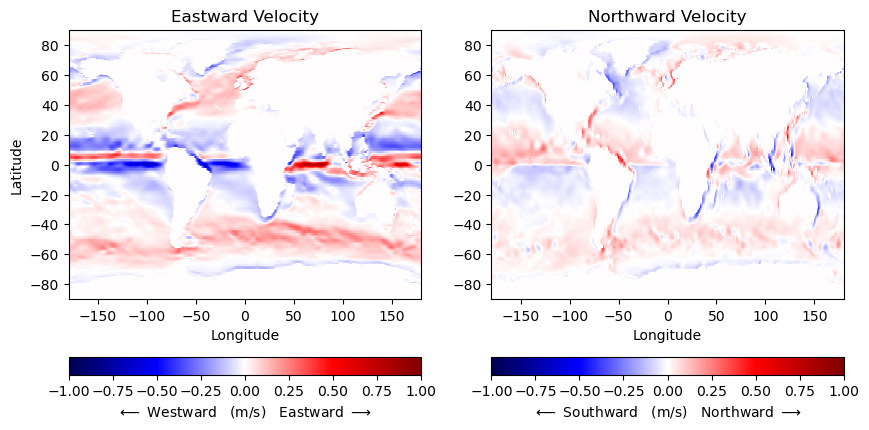

In [21]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

1.
30°N on the East Coast of the U.S.
Looking at the eastward velocity, there is a strong eastward flow around 30°N, indicating the Gulf Stream. The northward velocity plot also shows a northward flow, confirming the Gulf Stream, which moves warm water northward along the East Coast.

30°N on the West Coast of the U.S.
The eastward velocity is mostly neutral to slightly negative, indicating a westward component. The northward velocity is slightly negative, meaning a southward flow, characteristic of the California Current, which moves cold water southward along the coast.

45°N on the East Coast of the U.S.
The Gulf Stream moves northeastward into the Atlantic at this latitude, so the eastward velocity is strong and positive. The northward velocity might be weaker as the current turns eastward.

45°N on the West Coast of the U.S.
The California Current weakens around this latitude, but the flow is still southward and slightly westward.

2. The East Coast flows faster than the West Coast. The eastward velocity is much stronger on the East Coast compared to the West Coast. This is because the Gulf Stream is a western boundary current, which is narrower, deeper, and faster compared to the California Current, which is a weaker eastern boundary current.

3. North Atlantic Gyre:
The Gulf Stream carries warm water north along the U.S. East Coast, then flows east as the North Atlantic Drift. The Canary Current brings cold water south off Europe, and the North Equatorial Current moves it west, completing the cycle.

North Pacific Gyre:
The Kuroshio Current moves warm water north off Japan, then the North Pacific Current carries it east. The California Current pushes cold water south, and the North Equatorial Current moves it west, forming the gyre.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [22]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
file_path = "THETA_2015_12.nc"
ds_theta = xr.open_dataset(file_path)

In [23]:
# store the THETA grid into a into numpy array
theta = np.array(ds_theta['THETA'])
longitude = ds_theta['longitude']
latitude = ds_theta['latitude']

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

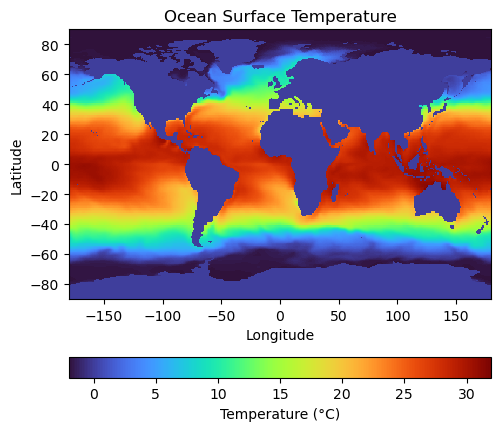

In [33]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(12,5))

# plot the data
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal', label='Temperature (°C)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Ocean Surface Temperature')
plt.show()

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

1. The west coast of the U.S. appears to have cooler ocean temperatures compared to the east coast at the same latitude.
2. The California Current is a cold, southward-flowing current originating from the North Pacific. It carries cold water from higher latitudes down along the western coastline of North America. The Gulf Stream is a warm, northward-flowing current that originates in the tropics.
It transports warm water from the Caribbean and the Gulf of Mexico up along the U.S. East Coast.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [35]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvel = xr.open_dataset("WVELSTAR_2015_12.nc")

In [36]:
# store the WVELSTAR grid into a into numpy array
wvel = np.array(ds_wvel['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [41]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
Zl = np.array(ds_wvel['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

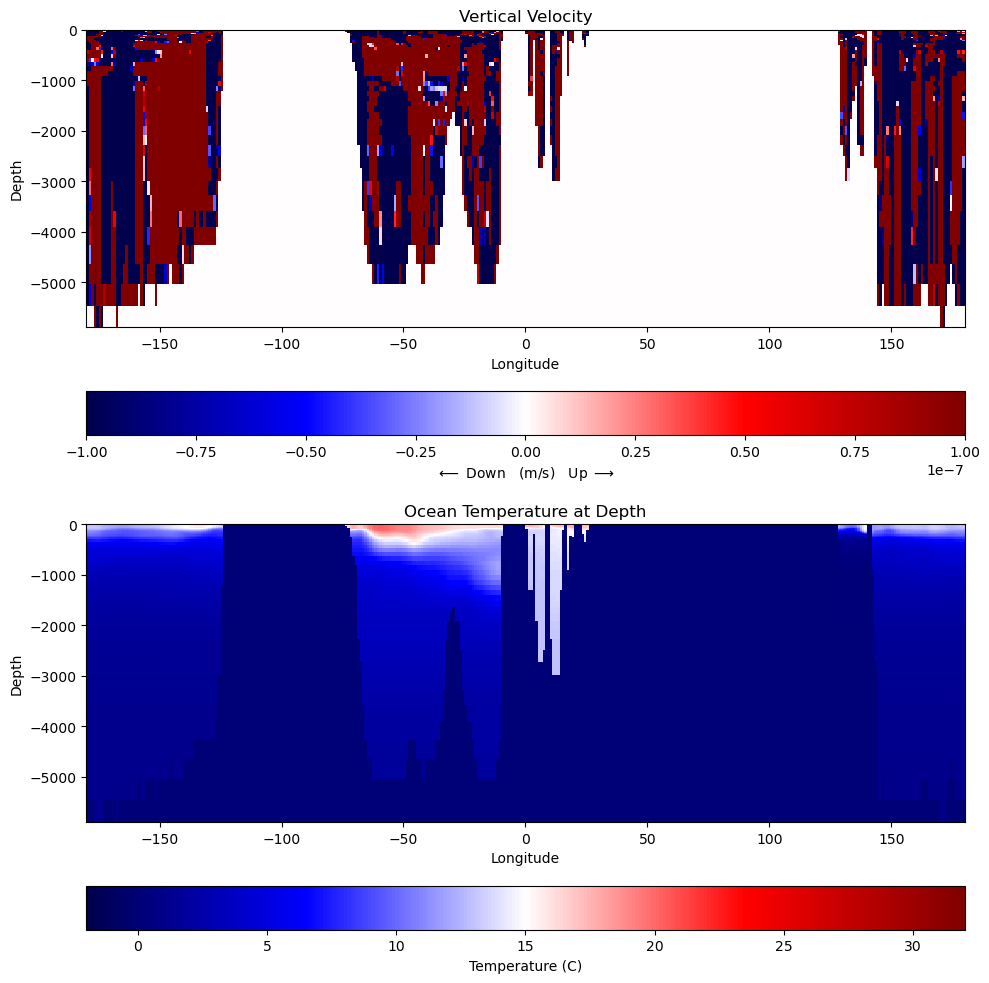

In [42]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
C = plt.pcolormesh(lon, Zl, wvel[0, :, 259, :], vmin=-0.0000001, vmax=0.0000001, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label= '$\longleftarrow$ Down   (m/s)   Up $\longrightarrow$')
plt.title("Vertical Velocity")
plt.ylabel('Depth')
plt.xlabel('Longitude')

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(lon, Zl, theta[0, :, 259, :], vmin=-2, vmax=32, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label='Temperature (C)')
plt.title("Ocean Temperature at Depth")
plt.ylabel('Depth')
plt.xlabel('Longitude')
plt.tight_layout()
plt.show()

### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

1. The west coast has stronger upwelling, while the east coast has weaker vertical motion due to downwelling.

2. Vertical velocity is much slower than horizontal velocity because it is driven by localized upwelling/downwelling, while horizontal currents are influenced by wind and Coriolis forces.

3. Upwelling on the west coast brings cold water to the surface, cooling the region, while downwelling on the east coast traps warm water, keeping it warmer.

4. Southward winds push surface water offshore, causing upwelling, which brings cold water up and cools the coast.